In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sampling distributions for sample mean

In [37]:
tips=sns.load_dataset('tips')
data={'total_bill':tips.total_bill,
      'tip':tips.tip}
df=pd.DataFrame(data)
population=df['total_bill'] # treat total bill as population
population

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [105]:
# population mean and std
population_mean=np.mean(population)
population_std=np.std(population)
print(f'population mean - {population_mean}')
print(f'population std - {population_std}')

population mean - 19.78594262295082
population std - 8.88415057777113


sample std - 1.6713945511410522
sample mean - 19.717862666666665


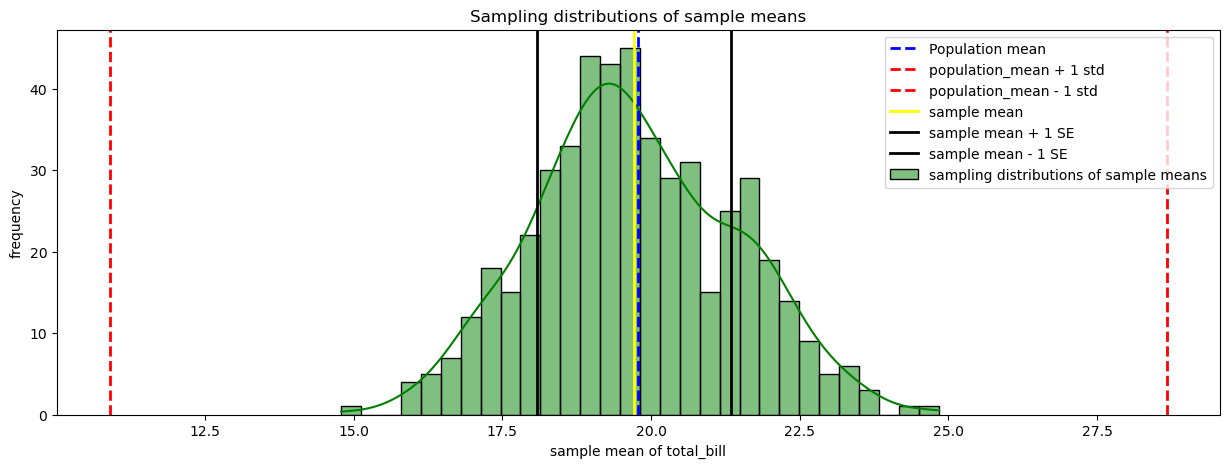

In [285]:
# step-1 draw random samples and compute sample means
sample_size=30 # size of each sample
num_samples=500
sample_means=[] # to store the sample means

for _ in range(num_samples):
    sample=np.random.choice(population,size=30,replace=True)
    #print(sample,len(sample))
    res=np.mean(sample)
    #print(res)
    sample_means.append(res)
    
#print(sample_means,len(sample_means))

# sample means and SE
sampling_std=np.std(sample_means)
print(f'sample std - {sampling_std}')

sampling_mean=np.mean(sample_means)
print(f'sample mean - {sampling_mean}')

# visualization 

plt.figure(figsize=(15,5))
sns.histplot(sample_means,kde=True,color='green',bins=30,label="sampling distributions of sample means")

#add vertical lines for population mean and population std deviation
plt.axvline(population_mean,color='blue',linestyle='--',linewidth=2,label='Population mean') # population mean 
plt.axvline(population_mean+population_std,color='red',linestyle='--',linewidth=2,label='population_mean + 1 std')
plt.axvline(population_mean-population_std,color='red',linestyle='--',linewidth=2,label='population_mean - 1 std')

#add vetical lines for sample means and sample std deviation
plt.axvline(sampling_mean,color='yellow',linestyle='solid',linewidth=2,label='sample mean')
plt.axvline(sampling_mean+sample_std,color='black',linestyle='solid',linewidth=2,label='sample mean + 1 SE')
plt.axvline(sampling_mean-sample_std,color='black',linestyle='solid',linewidth=2,label='sample mean - 1 SE')

plt.title('Sampling distributions of sample means')
plt.xlabel('sample mean of total_bill')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [ ]:
What this chart represents (big picture)

This chart shows the sampling distribution of sample means of total_bill.

That means:

You repeatedly took many samples from the population

Calculated the mean of each sample

Plotted all those means

➡️ The green histogram = distribution of sample means, not raw data.

# sampling distribution for sample proportions

In [ ]:
# sampling distribution of proportions of male approximate to normal distribution when sampled repeatedly. 

In [296]:
# step -1 load dataset 
tips['sex'].value_counts(normalize=True)

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

In [308]:
# step- 2 generate the sample propetions
population=tips['sex']=="Male" # covert into binary , true=male , falsefemale
sample_size=30
num_samples=1000

sample_proportions=[np.mean(np.random.choice(population,size=sample_size,replace=True)) for _ in range(num_samples)]
#print(sample_proportions)

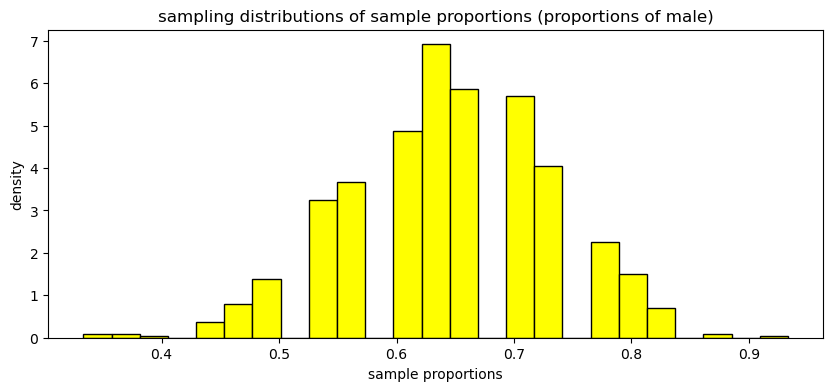

In [330]:
# step -3 visualize
plt.figure(figsize=(10,4))
plt.hist(sample_proportions,density=True,color='yellow',bins=25,edgecolor='black')
plt.title('sampling distributions of sample proportions (proportions of male)')
plt.xlabel('sample proportions')
plt.ylabel('density')
plt.show()